In [8]:
# https://github.com/alamhanz/clump_project/blob/master/customer_segmentation_1/Clustering%20Process.ipynb
# https://towardsdatascience.com/sql-window-functions-in-python-pandas-data-science-dc7c7a63cbb4
# https://stackoverflow.com/questions/62116416/rolling-sum-over-a-partition-in-python

# 5. Machine Learning plans

## Goal
train and predict on all eligble products using Machine Learning

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Clustering - ML
        [ ] ML Options
        [ ] Grid Search
         

In [9]:
import pandas as pd
import seaborn as sns
import sys
import numpy as np
import joblib
import matplotlib.pyplot as plt
# import duckdb
import random

import sys
sys.path.insert(1,'../src')
import dmdf
from ramal import jampi,min_date_use, eval_model,tuning_sma, sma_pred

pd.options.mode.chained_assignment = None  # default='warn'

import time
import warnings
warnings.filterwarnings("ignore")

In [15]:
## ML packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
PATH_DATA = '../data/'

## Get The Data

In [12]:
dfX = pd.read_csv(PATH_DATA+"data_demand_part5.csv")

In [13]:
dfX.head()

,Plant,Material,MonthYear,qu_trx,ids,qu_kal,is_kal_exist,is_trx_exist,demand
0,7ACH,0501 215 163,2019-05,0.0,7ACH:0501_215_163,0.0,0.0,1,0.0
1,7ACH,0501 215 163,2019-06,0.0,7ACH:0501_215_163,0.0,0.0,1,0.0
2,7ACH,0501 215 163,2019-07,0.0,7ACH:0501_215_163,0.0,0.0,1,0.0
3,7ACH,0501 215 163,2019-08,0.0,7ACH:0501_215_163,0.0,0.0,1,0.0
4,7ACH,0501 215 163,2019-09,0.0,7ACH:0501_215_163,0.0,0.0,1,0.0


In [14]:
all5_unique = dfX.ids.unique()
len(all5_unique)

682

In [18]:
## use last 18 months data only
dfX2 = dfX[(dfX.MonthYear>='2020-10')&(dfX.MonthYear<='2022-04')]

## Clustering

#### Data Prepare

In [33]:
ss_demand = StandardScaler()
all_demand = dfX2.demand.values.reshape([-1,1])
ss_demand.fit(all_demand)

StandardScaler()

In [34]:
dfX2['demand_ss'] = ss_demand.transform(all_demand)
dfG1 = dfX2.groupby(['ids','MonthYear'])['demand_ss'].sum().unstack()

In [35]:
dfG1.sample(10)

MonthYear,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04
ids,,,,,,,,,,,,,,,,,,,
7M66:40102093,-0.562427,-0.385668,-0.491724,-0.491724,-0.668483,-0.491724,-0.456372,-0.562427,-0.314964,-0.350316,-0.562427,-0.491724,-0.456372,-0.597779,-0.491724,-0.597779,-0.668483,-0.173557,-0.527076
7M66:2992261,-0.279612,-0.527076,-0.456372,-0.456372,-0.491724,-0.491724,-0.456372,-0.597779,-0.527076,-0.421020,-0.527076,-0.527076,-0.491724,-0.385668,-0.597779,-0.527076,-0.385668,-0.421020,-0.491724
7PLB:2994048,-0.491724,-0.244260,-0.527076,-0.385668,-0.597779,-0.314964,-0.244260,-0.456372,-0.279612,-0.314964,-0.527076,-0.491724,-0.668483,-0.138205,-0.067501,0.109259,-0.208908,-0.138205,-0.138205
7M39:0636_304_088,-0.385668,-0.385668,-0.385668,-0.279612,-0.491724,-0.208908,-0.350316,-0.173557,-0.173557,-0.314964,-0.421020,-0.208908,-0.279612,-0.597779,-0.102853,-0.456372,-0.173557,-0.244260,-0.350316
7KK1:14196370,1.028408,1.028408,1.028408,2.725299,-0.668483,1.028408,-0.668483,2.725299,1.028408,1.028408,11.209755,1.028408,1.028408,1.028408,2.725299,1.028408,9.512864,-0.668483,-0.668483
7ACH:42127773,-0.421020,-0.456372,-0.421020,-0.314964,-0.456372,0.038555,-0.633131,-0.527076,-0.491724,-0.421020,-0.491724,0.144610,-0.421020,-0.491724,-0.350316,-0.491724,-0.456372,-0.597779,-0.456372
7M66:98116292AS,-0.244260,-0.385668,0.038555,-0.102853,-0.244260,-0.279612,-0.067501,-0.456372,-0.456372,-0.032149,-0.456372,-0.244260,-0.102853,-0.032149,-0.385668,-0.314964,-0.244260,-0.102853,-0.421020
7M39:2477955,-0.244260,-0.208908,-0.314964,-0.314964,-0.279612,-0.208908,-0.421020,-0.491724,-0.350316,0.250666,-0.527076,-0.244260,-0.350316,0.144610,-0.173557,-0.279612,0.109259,-0.597779,-0.421020
7M39:42127252,0.745593,0.038555,-0.314964,1.452631,-0.314964,0.038555,0.038555,-0.668483,0.745593,0.038555,0.392074,0.745593,0.038555,0.038555,1.099112,0.392074,1.099112,-0.668483,-0.668483


<AxesSubplot:xlabel='MonthYear'>

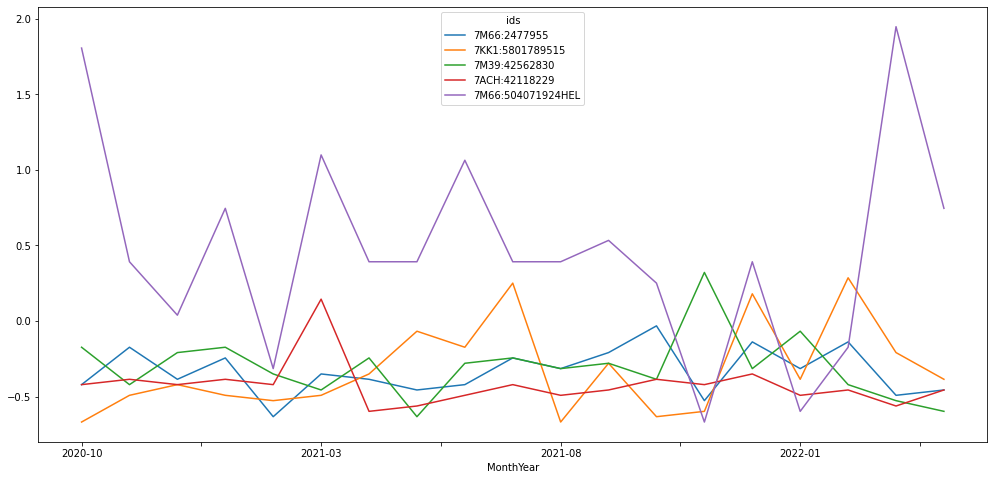

In [49]:
rand_ids = random.choices(dfG1.index, k =5)
dfG1.loc[rand_ids].transpose().plot(figsize = (17,8))

In [51]:
Xt = dfG1

#### Clustering

In [100]:
Km=KMeans(n_clusters=5)
Km.fit(Xt)

KMeans(n_clusters=5)

In [101]:
dfG1['clus1']=Km.predict(Xt)

In [102]:
dfG1.groupby('clus1').size()

clus1
0    294
1     34
2    265
3     12
4     77
dtype: int64

<AxesSubplot:xlabel='MonthYear'>

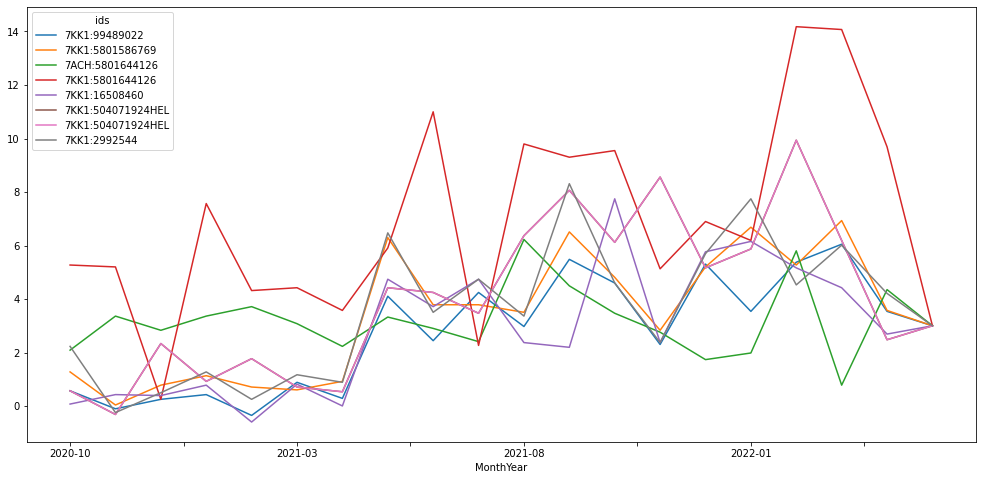

In [109]:
dfG1_temp = dfG1[dfG1.clus1 == 3]

rand_ids = random.choices(dfG1_temp.index, k = 8)
dfG1_temp.loc[rand_ids].transpose().plot(figsize = (17,8))